### Coursework 2

In this coursework you will be aiming to complete two classification tasks.
Both the classification tasks relate to text classification tasks.

One task is to be solved using Support Vector Machines. The other has to be solved using Boosting.

The specific tasks and the marking for the various tasks are provided in the notebook. Each task is expected to be accompanied by a lab-report. Each task can have a concise lab report that is maximum of one page in an A4 size. You will be expected to submit your Jupyter Notebook and all lab reports as a single zip file. You could have additional functions implemented that you require for carrying out each task.


#### Task 1

In this task, you need to obtain sentiment analysis for the provided dataset. The dataset consists of movie reviews with the sentiments being provided. The sentiments are either positive or negative. You need to train an SVM based classifier to obtain train and check on the sample test dataset provided. The method will be evaluated also against an external test set. Please do not hardcode any dimensions or number of samples while writing the code. It should be possible to automate the testing and hardcoding values does not allow for automated testing.

You are allowed to use scikit-learn to implement the SVM. However, you are expected to write your own kernels.

You are allowed to use the existing library functions such as scikit-learn or numpy for obtaining the SVM. The main idea is to analyse the dataset using different kind of kernels. You are also supposed to write your own custom text kernels. Refer to the documentation provided [here](https://scikit-learn.org/stable/modules/svm.html) at 1.4.6.2 and an example [here](https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html) for writing your own kernels.

Details regarding the marking have been provided in the coursework specification file. Ensure that the code can be run with different test files.


#### Process the text and obtain a bag of words-based features


In [1]:
def extract_bag_of_words_train_test(train_file, test_file):
    import numpy as np
    import re
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('stopwords')

    class Lemmatizer():
        def __init__(self):
            self.lemmatizer = WordNetLemmatizer()
            self.token_regex = re.compile('[A-Za-z\']{3,}')

        def __call__(self, corpus):
            # Only tokens that are 3 or more characters in length, and are not stopwords, will be considered
            return [self.lemmatizer.lemmatize(token, pos='v') for token in word_tokenize(corpus)
                    if self.token_regex.search(token) and token not in stopwords.words('english')]

    # Regular expressions to extract reviews and sentiments from lines in file
    review_regex = re.compile('(\"?.+\"?),(positive|negative)')
    sent_regex = re.compile(',(positive|negative)\\n?')

    # Read the CSV file and extract Bag of Words Features
    # Training data:
    with open(train_file) as f:
        train_lines = f.readlines()

    # Initialise lists and string to hold the review texts, sentiments and the entire
    # corpus of words from the training set
    train_reviews = []
    train_sentiments = []
    # Loop over all lines in the training data file, extract the review and sentiment
    # at each iteration, also add the review to the corpus string
    for i in range(1, len(train_lines)):
        # Replace HTML tags with spaces
        train_lines[i] = train_lines[i].replace('<br /><br />', ' ')
        # Regexes extract review and sentiment from line
        review = review_regex.search(train_lines[i]).group(1)
        sentiment = sent_regex.search(train_lines[i]).group(1)
        train_reviews.append(review)
        train_sentiments.append(sentiment)

    # Create the X_train array from a TfidfVectorizer fit on the training corpus
    tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 2),
                                       tokenizer=Lemmatizer(), max_features=10000)
    tfidf_vectorizer.fit(train_reviews)
    X_train = tfidf_vectorizer.transform(train_reviews).toarray()

    # Initialise the y vector with length equal to the number of training reviews
    y_train = np.zeros((len(train_sentiments)))
    # For each review, set the corresponding value in the y vector to 0 if negative, 1 if positive
    for s in range(len(train_sentiments)):
        if train_sentiments[s] == 'positive':
            y_train[s] = 1

    # Test data:
    with open(test_file) as f:
        test_lines = f.readlines()

    # Initialise lists to hold the review texts and sentiments
    test_reviews = []
    test_sentiments = []

    # Loop over all lines in the test data file, extract the reviews and sentiments
    for i in range(1, len(test_lines)):
        # Replace HTML tags with spaces
        test_lines[i] = test_lines[i].replace('<br /><br />', ' ')
        review = review_regex.search(test_lines[i]).group(1)
        sentiment = sent_regex.search(test_lines[i]).group(1)
        test_reviews.append(review)
        test_sentiments.append(sentiment)

    # Create the X_test array from a TfidfVectorizer fit on the training corpus
    X_test = tfidf_vectorizer.transform(test_reviews).toarray()

    # Initialise the y vector with length equal to the number of testing reviews
    y_test = np.zeros((len(test_sentiments)))
    # For each review, set the corresponding value in the y vector to 0 if negative, 1 if positive
    for s in range(len(test_sentiments)):
        if test_sentiments[s] == 'positive':
            y_test[s] = 1

    return (X_train, y_train, X_test, y_test)


In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_text=set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /home/ferdie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ferdie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ferdie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print(stop_text)

{'her', 'if', 'under', 'no', 'm', 'the', 'more', 'won', 'ourselves', "hasn't", 'at', 'ma', 'after', "don't", "won't", 'now', 'only', "she's", 'through', "didn't", "you'd", 'do', 'over', 'off', 'not', 'aren', 'as', 'are', 'haven', 'or', 'just', 'few', 've', 'was', 'did', "you're", 'itself', 'that', 'wouldn', 'and', 'mightn', 'any', 'ours', 'him', 'before', 'during', 'why', 'who', 'am', "isn't", 'wasn', 'we', 'should', 'those', 'about', 'mustn', 'she', 'own', 'what', 'too', "it's", 'hadn', 'on', 'its', 'an', 'be', 'doing', 'himself', 'each', 'a', 'shan', 'into', 'this', "should've", 'because', 'other', 'is', "wasn't", 'of', 'll', 'up', 't', 'hasn', 'for', 'above', 'how', 'so', 'had', 're', 'weren', 'isn', 'yourself', 'being', 'doesn', "hadn't", 'by', 'until', 'out', 'such', 's', 'which', 'from', 'further', 'didn', 'whom', 'has', "that'll", 'couldn', 'he', 'some', 'd', 'below', 'having', 'yourselves', 'but', 'most', 'these', "you've", 'once', 'in', 'against', 'shouldn', "mightn't", "haven

In [4]:
print(type(stop_text))
custom_stop={'most', 'been', 's', 'doing', 'yourselves', "that'll", 'that', 'y', 'what',  'can',
     'above', 'on', 'our', 'during', 'other', 'he', 'yours', 'just', 'their', 'off', 'after',
     "aren't", 'had', 'should', 'isn', "mustn't", 'hers', 'or', "won't", 'down', 'with', 'out', 'whom', 'ours', 'am', 
     "hadn't", 'has', 'is', 'aren', 'mightn', 'a', 'than', 'weren', 'this', 'my', 'do', 'we', 'those', 'it', 'who', 
     'yourself', "wouldn't", 'having', 'themselves', 'did', 'while', 'few', 'were', 'd', 'at', 'such', 'your', 'doesn',
     "don't", 'now', 'them', 'i', 'me', 'there', 'o', "doesn't", 'very', 'so', 'by', 'himself', 'where', 'hadn', 'won',
     "didn't", 'if', 'ma', 'haven', 'itself', 'over', 'some', 'between', 'through', 'its', "shouldn't", 'was', 'about', 
     've', 'any', 'in', "it's", 'once', 'up', 'further', 'for', 'her', 'she', 'shan', 'again', 'how', "should've", 'hasn',
     'needn', 'then', 'from', 'too', 'will', 'under', 't', 'each', 'no', 'm', 'same', 'be', "you're", 'an', 'his', 
     'couldn', "couldn't", 'ain', 'but', 'why', 'not', 'into', 'll', 'they', 'below', 'ourselves', 'theirs', 'does',
     'don', 'to', 'the', 'as', 'here', 'and', "hasn't", 'of', 'have', 'because', 'when', 'more', "she's", "haven't",
     'against', "you'll", 'wouldn', 'which', "mightn't", "needn't", 'him', 'are', 'shouldn', 'being', "shan't", 'until',
     "you've", 'wasn', 'didn', 're', 'these', 'herself', 'before', 'own', "you'd", 'both', 'myself', 'only', "isn't", 
     'you', 'all'}
indes_stop=[3,11]
words_removed={'nor','mustn',"wasn't","weren't",'don',}

<class 'set'>


In [5]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances


class SVMClassifierTobo:
    def __init__(self):
        import numpy as np
        from sklearn import svm

    # define your own kernel here
    # Refer to the documentation here: https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
    def linear_kernel(self, X, Y):
        return np.dot(X, Y.T)

    def cosine_kernel(self, X, Y):
        return np.dot(X, Y.T) / (np.linalg.norm(X) * np.linalg.norm(Y))

    def build_gaussian_kernel(self, sigma):
        def gaussian_kernel(X, Y):
            return np.exp(-sigma*euclidean_distances(X, Y)**2)
        return gaussian_kernel

    def build_laplacian_kernel(self, sigma):
        def laplacian_kernel(X, Y):
            return np.exp(-sigma*manhattan_distances(X, Y))
        return laplacian_kernel

    def build_poly_kernel(self, sigma, alpha, d):
        def poly_kernel(X, Y):
            return (sigma*np.dot(X, Y.T) + alpha)**d
        return poly_kernel

    def build_sigmoid_kernel(self, sigma, alpha):
        def sigmoid_kernel(X, Y):
            return np.tanh(sigma*np.dot(X, Y.T) + alpha)
        return sigmoid_kernel

    def build_quad_kernel(self, sigma, alpha):
        def rational_quad_kernel(X, Y):
            # https://yugeten.github.io/posts/2019/09/GP/
            return (1 + (sigma*manhattan_distances(X, Y))/alpha)**(-alpha)
        return rational_quad_kernel

    def build_periodic_kernel(self, sigma, alpha):
        def periodic_kernel(X, Y):
            # https://yugeten.github.io/posts/2019/09/GP/
            return np.cos(alpha*manhattan_distances(X, Y)) * np.exp(-sigma*manhattan_distances(X, Y))
        return periodic_kernel

    def build_expsinsq_kernel(self, sigma, alpha):
        def expsinsq_kernel(X, Y):
            return np.exp(-2*sigma*np.sin((np.pi*euclidean_distances(X, Y))/alpha)**2)
        return expsinsq_kernel

    def hyperparameter_tuning(self, X, y):
        # # cross-validation performance of linear kernel
        # cv_results = cross_validate(svm.SVC(kernel=self.linear_kernel), X, y, scoring='accuracy', cv=5)
        # print('linear_kernel', np.mean(cv_results['test_score']))

        # # cross-validation performance of cosine kernel
        # cv_results = cross_validate(svm.SVC(kernel=self.cosine_kernel), X, y, scoring='accuracy', cv=5)
        # print('cosine_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(
            kernel=self.build_gaussian_kernel(sigma=1)), X, y, scoring='accuracy', cv=5)
        print('gaussian_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(
            kernel=self.build_laplacian_kernel(sigma=1)), X, y, scoring='accuracy', cv=5)
        print('laplacian_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(kernel=self.build_poly_kernel(
            sigma=1, alpha=1, d=2)), X, y, scoring='accuracy', cv=5)
        print('poly2_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(kernel=self.build_poly_kernel(
            sigma=1, alpha=1, d=3)), X, y, scoring='accuracy', cv=5)
        print('poly3_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(kernel=self.build_sigmoid_kernel(
            sigma=1, alpha=1)), X, y, scoring='accuracy', cv=5)
        print('sigmoid_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(kernel=self.build_quad_kernel(
            sigma=1, alpha=1)), X, y, scoring='accuracy', cv=5)
        print('quad_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(kernel=self.build_periodic_kernel(
            sigma=1, alpha=1)), X, y, scoring='accuracy', cv=5)
        print('periodic_kernel', np.mean(cv_results['test_score']))

        cv_results = cross_validate(svm.SVC(kernel=self.build_expsinsq_kernel(
            sigma=1, alpha=1)), X, y, scoring='accuracy', cv=5)
        print('expsinsq_kernel', np.mean(cv_results['test_score']))

        # hyperparameter tuning gaussian kernel
        space = {'sigma': [1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0]}
        best_sigma = 0.0
        best_accuracy = 0.0
        print('gaussian_kernel:')
        for sig in space['sigma']:
            cv_results = cross_validate(svm.SVC(kernel=self.build_gaussian_kernel(
                sigma=sig)), X, y, scoring='accuracy', cv=5)
            print('sigma=', sigma)
            print('cv=5 results:', cv_results['test_score'])
            print('mean result:', np.mean(cv_results['test_score']))
            if np.mean(cv_results['test_score']) > best_accuracy:
                best_accuracy = np.mean(cv_results['test_score'])
                best_sigma = sig

        print('best accuracy: %f' % best_accuracy)
        print('best sigma: %f' % best_sigma)
        print()

#         # hyperparameter tuning laplacian kernel
#         space = {'sigma':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0]}
#         best_sigma = 0.0
#         best_accuracy = 0.0
#         print('laplacian_kernel:')
#         for sig in space['sigma']:
#             cv_results = cross_validate(svm.SVC(kernel=self.build_laplacian_kernel(sigma=sig)), X, y, scoring='accuracy', cv=5)
#             print('sigma=', sig)
#             print('cv=5 results:', cv_results['test_score'])
#             print('mean result:', np.mean(cv_results['test_score']))
#             if np.mean(cv_results['test_score']) > best_accuracy:
#                 best_accuracy = np.mean(cv_results['test_score'])
#                 best_sigma = sig

#         print('best accuracy: %f' % best_accuracy)
#         print('best sigma: %f' % best_sigma)
#         print()

#         # hyperparameter tuning polynomial kernel
#         space = {'sigma':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0],
#                  'alpha':[-2, -1, 0, 1, 2],
#                  'd':[1, 2, 3, 4, 5]}
#         best_sigma = 0.0
#         best_alpha = 0
#         best_d = 0
#         best_accuracy = 0.0
#         print('polynomial_kernel:')
#         for sig in space['sigma']:
#             for alph in space['alpha']:
#                 for degree in space['d']:
#                     cv_results = cross_validate(svm.SVC(kernel=self.build_poly_kernel(sigma=sig, alpha=alph, d=degree)), X, y, scoring='accuracy', cv=5)
#                     print('sigma=', sig, 'alpha=', alph, 'd=', degree)
#                     print('cv=5 results:', cv_results['test_score'])
#                     print('mean result:', np.mean(cv_results['test_score']))
#                     if np.mean(cv_results['test_score']) > best_accuracy:
#                         best_accuracy = np.mean(cv_results['test_score'])
#                         best_sigma = sig
#                         best_alpha = alph
#                         best_d = degree

#         print('best accuracy: %f' % best_accuracy)
#         print('best sigma: %f' % best_sigma)
#         print('best alpha: %d' % best_alpha)
#         print('best d: %d' % best_d)
#         print()

#         # hyperparameter tuning sigmoid kernel
#         space = {'sigma':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0],
#                  'alpha':[-2, -1, 0, 1, 2]}
#         best_sigma = 0.0
#         best_alpha = 0.0
#         best_accuracy = 0.0
#         print('sigmoid_kernel:')
#         for sig in space['sigma']:
#             for alph in space['alpha']:
#                 cv_results = cross_validate(svm.SVC(kernel=self.build_sigmoid_kernel(sigma=sig, alpha=alph)), X, y, scoring='accuracy', cv=5)
#                 print('sigma=', sig, 'alpha=', alph)
#                 print('cv=5 results:', cv_results['test_score'])
#                 print('mean result:', np.mean(cv_results['test_score']))
#                 if np.mean(cv_results['test_score']) > best_accuracy:
#                     best_accuracy = np.mean(cv_results['test_score'])
#                     best_sigma = sig
#                     best_alpha = alph

#         print('best accuracy: %f' % best_accuracy)
#         print('best sigma: %f' % best_sigma)
#         print('best alpha: %d' % best_alpha)
#         print()

#         # hyperparameter tuning rational quadratic kernel
#         space = {'sigma':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0],
#                  'alpha':[-1, 0.1, 0.5, 1, 2]}
#         best_sigma = 0.0
#         best_alpha = 0.0
#         best_accuracy = 0.0
#         print('rational_quad_kernel:')
#         for sig in space['sigma']:
#             for alph in space['alpha']:
#                 cv_results = cross_validate(svm.SVC(kernel=self.build_quad_kernel(sigma=sig, alpha=alph)), X, y, scoring='accuracy', cv=5)
#                 print('sigma=', sig, 'alpha=', alph)
#                 print('cv=5 results:', cv_results['test_score'])
#                 print('mean result:', np.mean(cv_results['test_score']))
#                 if np.mean(cv_results['test_score']) > best_accuracy:
#                     best_accuracy = np.mean(cv_results['test_score'])
#                     best_sigma = sig
#                     best_alpha = alph

#         print('best accuracy: %f' % best_accuracy)
#         print('best sigma: %f' % best_sigma)
#         print('best alpha: %d' % best_alpha)
#         print()

#         # hyperparameter tuning periodic kernel
#         space = {'sigma':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0],
#                  'alpha':[-1, 0.1, 0.5, 1, 2]}
#         best_sigma = 0.0
#         best_alpha = 0.0
#         best_accuracy = 0.0
#         print('periodic_kernel:')
#         for sig in space['sigma']:
#             for alph in space['alpha']:
#                 cv_results = cross_validate(svm.SVC(kernel=self.build_periodic_kernel(sigma=sig, alpha=alph)), X, y, scoring='accuracy', cv=5)
#                 print('sigma=', sig, 'alpha=', alph)
#                 print('cv=5 results:', cv_results['test_score'])
#                 print('mean result:', np.mean(cv_results['test_score']))
#                 if np.mean(cv_results['test_score']) > best_accuracy:
#                     best_accuracy = np.mean(cv_results['test_score'])
#                     best_sigma = sig
#                     best_alpha = alph

#         print('best accuracy: %f' % best_accuracy)
#         print('best sigma: %f' % best_sigma)
#         print('best alpha: %d' % best_alpha)
#         print()

#         # hyperparameter tuning expsinsquared kernel
#         space = {'sigma':[1e-6, 1e-4, 1e-2, 0.1, 0.5, 1.0, 2.0],
#                  'alpha':[-1, 0.1, 0.5, 1, 2]}
#         best_sigma = 0.0
#         best_alpha = 0.0
#         best_accuracy = 0.0
#         print('expsinsq_kernel:')
#         for sig in space['sigma']:
#             for alph in space['alpha']:
#                 cv_results = cross_validate(svm.SVC(kernel=self.build_expsinsq_kernel(sigma=sig, alpha=alph)), X, y, scoring='accuracy', cv=5)
#                 print('sigma=', sig, 'alpha=', alph)
#                 print('cv=5 results:', cv_results['test_score'])
#                 print('mean result:', np.mean(cv_results['test_score']))
#                 if np.mean(cv_results['test_score']) > best_accuracy:
#                     best_accuracy = np.mean(cv_results['test_score'])
#                     best_sigma = sig
#                     best_alpha = alph

#         print('best accuracy: %f' % best_accuracy)
#         print('best sigma: %f' % best_sigma)
#         print('best alpha: %d' % best_alpha)
#         print()

    def fit(self, X, y):
        # training of the SVM
        # Ensure you call your own defined kernel here
        return

    def predict(self, X):
        # prediction routine for the SVM
        return


In [6]:
import time

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.model_selection import GridSearchCV


class SVMClassifier:
    def __init__(self):
        self.gaussian_C = 10
        self.gaussian_sigma = 0.03981
        self.laplacian_C = 100
        self.laplacian_sigma = 0.00063
        self.linear_C = 0.3874675120456132

    # define your own kernel here
    # Refer to the documentation here: https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
    def build_linear_kernel(self):
        def linear_kernel(X,Y):
            return np.dot(X, Y.T)
        return linear_kernel

    def build_gaussian_kernel(self, sigma):
        def gaussian_kernel(X, Y):
            return np.exp(-sigma*euclidean_distances(X, Y)**2)
        return gaussian_kernel

    def build_laplacian_kernel(self, sigma):
        def laplacian_kernel(X, Y):
            return np.exp(-sigma*manhattan_distances(X, Y))
        return laplacian_kernel

    def hyperparameter_tuning(self, X, y):
        self.results = {'gaussian': {}, 'laplacian': {}}
        kernels = [self.build_gaussian_kernel, self.build_laplacian_kernel]
        space = {'sigma': np.logspace(-3, 1, 6), 'C': np.logspace(-2, 3, 6)}
        for kernel in kernels:
            kernel_name = kernel.__name__.split('_')[1]
            print(f'kernel function: {kernel_name}')
            scores = np.zeros((len(space['sigma']), len(space['C'])))
            best_accuracy = 0.0
            for i, sig in enumerate(space['sigma']):
                start = time.time()
                for j, c in enumerate(space['C']):
                    print(f'current run: sigma: {sig}, C: {c}')
                    print(
                        f"progress: {i*len(space['C'])+j} / {len(space['sigma'])*len(space['C'])}")
                    cv_results = cross_validate(svm.SVC(C=c, kernel=kernel(sigma=sig)),
                                                X, y, scoring='accuracy', cv=5)
                    mean_score = np.mean(cv_results['test_score'])
                    scores[i, j] = mean_score  # rows are sig, columns are C
                    if mean_score > best_accuracy:
                        best_accuracy = mean_score
                        self.results[kernel_name]['best_accuracy'] = mean_score
                        self.results[kernel_name]['best_sigma'] = sig
                        self.results[kernel_name]['best_c'] = c
                    elapsed_time_fl = (time.time() - start)
                    print(elapsed_time_fl)
            self.results[kernel_name]['scores'] = scores

    def linearHyperparameterTuning(self, X, y):
        self.results = {'linear': {}}
        space = {'C': np.logspace(-2, 1, 18)}
        kernel = self.build_linear_kernel
        kernel_name = kernel.__name__.split('_')[1]
        print(f'kernel function: {kernel_name}')
        scores = np.zeros(len(space['C']))
        best_accuracy = 0.0
        start = time.time()
        for j, c in enumerate(space['C']):
            print(f'current run: C: {c}')
            print(f"progress: {j} / {len(space['C'])}")
            cv_results = cross_validate(svm.SVC(C=c, kernel=kernel()),
                                        X, y, scoring='accuracy', cv=5)
            mean_score = np.mean(cv_results['test_score'])
            scores[j] = mean_score  # rows are sig, columns are C
            if mean_score > best_accuracy:
                best_accuracy = mean_score
                self.results[kernel_name]['best_accuracy'] = mean_score
                self.results[kernel_name]['best_c'] = c
                elapsed_time_fl = (time.time() - start)
                print(elapsed_time_fl)

        self.results[kernel_name]['scores'] = scores

    def fit(self, X, y):
        # training of the SVM
        # Ensure you call your own defined kernel here
        gaussian_kernel=self.build_gaussian_kernel
        gaussian_svm = svm.SVC(C=self.gaussian_C, kernel=gaussian_kernel(sigma=self.gaussian_sigma))
        self.gaussian_svm = gaussian_svm.fit(X,y)

        laplacian_kernel=self.build_laplacian_kernel
        laplacian_svm = svm.SVC(C=self.laplacian_C, kernel=laplacian_kernel(sigma=self.laplacian_sigma))
        self.laplacian_svm = laplacian_svm.fit(X,y)

        linear_kernel = self.build_linear_kernel
        linear_svm = svm.SVC(kernel=linear_kernel(), C=self.linear_C)
        self.linear_svm = linear_svm.fit(X, y)

        return

    def predict(self, X):
        # prediction routine for the SVM
        # return self.gaussian_svm.predict(X)
        # return self.laplacian_svm.predict(X)
        return self.linear_svm.predict(X)


In [11]:
# https://datascience.stackexchange.com/questions/22416/passing-a-custom-kernel-with-more-than-two-arguments-into-svm-svc-in-scikit-le
# https://stackoverflow.com/questions/43470610/how-to-tune-parameters-of-custom-kernel-function-with-pipeline-in-scikit-learn
# https://stackoverflow.com/questions/24595153/is-it-possible-to-tune-parameters-with-grid-search-for-custom-kernels-in-scikit
# https://uwspace.uwaterloo.ca/bitstream/handle/10012/3063/svm.pdf?sequence=1

X_train, y_train, X_test, y_test = extract_bag_of_words_train_test(
    "movie_review_train.csv", "movie_review_test.csv")
machine = SVMClassifier()
# machine3.hyperparameter_tuning(X_train, y_train)
machine.linearHyperparameterTuning(X_train, y_train)
machine.hyperparameter_tuning(X_train,y_train)


[nltk_data] Downloading package punkt to /home/ferdie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ferdie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ferdie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/ferdie/anaconda3/envs/nlp-env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


kernel function: linear
current run: C: 0.01
progress: 0 / 18
3.74005389213562
current run: C: 0.015013107289081735
progress: 1 / 18
current run: C: 0.022539339047347912
progress: 2 / 18
current run: C: 0.033838551534282335
progress: 3 / 18
15.274600267410278
current run: C: 0.05080218046913023
progress: 4 / 18
18.992334604263306
current run: C: 0.07626985859023444
progress: 5 / 18
current run: C: 0.11450475699382819
progress: 6 / 18
26.56685733795166
current run: C: 0.17190722018585747
progress: 7 / 18
30.277348279953003
current run: C: 0.2580861540418075
progress: 8 / 18
34.12293887138367
current run: C: 0.3874675120456132
progress: 9 / 18
37.739380836486816
current run: C: 0.5817091329374361
progress: 10 / 18
current run: C: 0.8733261623828438
progress: 11 / 18
45.64565300941467
current run: C: 1.3111339374215643
progress: 12 / 18
current run: C: 1.9684194472866132
progress: 13 / 18
current run: C: 2.955209235202888
progress: 14 / 18
current run: C: 4.436687330978616
progress: 15 / 

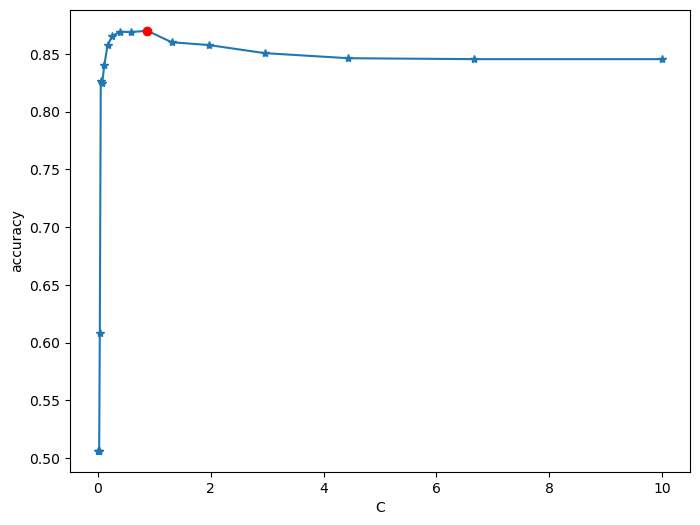

0.8700000000000001
0.8733261623828438
{'best_accuracy': 0.8700000000000001, 'best_c': 0.8733261623828438, 'scores': array([0.5064, 0.5064, 0.5064, 0.6086, 0.8262, 0.8248, 0.8402, 0.8578,
       0.8654, 0.8692, 0.8688, 0.87  , 0.86  , 0.8576, 0.8506, 0.8462,
       0.8454, 0.8454])}


In [8]:
import matplotlib.pyplot as plt

space = {'C': np.logspace(-2, 1, 18)}


def plot_results(results, best_c, name):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot((space['C']), results, marker='*',zorder=1)  # rows are sig, columns are C
    plt.scatter((best_c), machine.results['linear']['best_accuracy'], c='red',zorder=2)
    ax.set_xlabel('C')
    ax.set_ylabel('accuracy')  
#  ax.set_xlabel('log C')
    #plt.savefig(name+'_grid_search.png')
    plt.show()


plot_results(machine.results['linear']['scores'], machine.results['linear']
             ['best_c'], name='linear')
print(machine.results['linear']['best_accuracy'])
print(machine.results['linear']['best_c'])

print(machine.results['linear'])

In [13]:
machine.results

{'gaussian': {'best_accuracy': 0.8695999999999999,
  'best_sigma': 0.25118864315095824,
  'best_c': 1.0,
  'scores': array([[0.5064, 0.5064, 0.5064, 0.5064, 0.8614, 0.8574],
         [0.5064, 0.5064, 0.5064, 0.842 , 0.8602, 0.8456],
         [0.5064, 0.5064, 0.8244, 0.869 , 0.8472, 0.8472],
         [0.5064, 0.5536, 0.8696, 0.86  , 0.86  , 0.86  ],
         [0.5064, 0.5064, 0.8652, 0.8668, 0.8668, 0.8668],
         [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076]])},
 'laplacian': {'best_accuracy': 0.8708,
  'best_sigma': 0.00630957344480193,
  'best_c': 10.0,
  'scores': array([[0.5064, 0.5064, 0.5064, 0.846 , 0.8664, 0.8576],
         [0.5064, 0.5064, 0.827 , 0.8708, 0.8594, 0.8594],
         [0.5064, 0.6802, 0.8642, 0.8642, 0.8642, 0.8642],
         [0.5064, 0.5064, 0.847 , 0.85  , 0.85  , 0.85  ],
         [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076],
         [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076]])}}

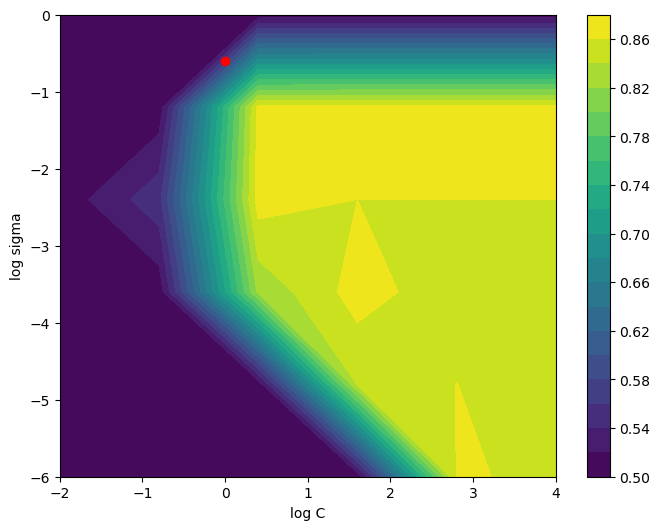

0.8695999999999999
1.0
0.25118864315095824
{'best_accuracy': 0.8695999999999999, 'best_sigma': 0.25118864315095824, 'best_c': 1.0, 'scores': array([[0.5064, 0.5064, 0.5064, 0.5064, 0.8614, 0.8574],
       [0.5064, 0.5064, 0.5064, 0.842 , 0.8602, 0.8456],
       [0.5064, 0.5064, 0.8244, 0.869 , 0.8472, 0.8472],
       [0.5064, 0.5536, 0.8696, 0.86  , 0.86  , 0.86  ],
       [0.5064, 0.5064, 0.8652, 0.8668, 0.8668, 0.8668],
       [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076]])}


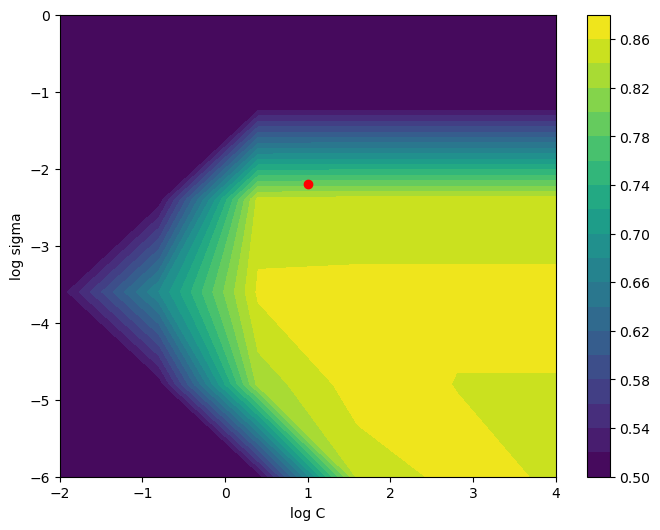

0.8708
10.0
0.00630957344480193
{'best_accuracy': 0.8708, 'best_sigma': 0.00630957344480193, 'best_c': 10.0, 'scores': array([[0.5064, 0.5064, 0.5064, 0.846 , 0.8664, 0.8576],
       [0.5064, 0.5064, 0.827 , 0.8708, 0.8594, 0.8594],
       [0.5064, 0.6802, 0.8642, 0.8642, 0.8642, 0.8642],
       [0.5064, 0.5064, 0.847 , 0.85  , 0.85  , 0.85  ],
       [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076],
       [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076]])}


In [14]:
## gausian and lapplacian plots
import matplotlib.pyplot as plt

space = {'sigma': np.logspace(-6, 0, 6), 'C': np.logspace(-2, 4, 6)}


def plot_results(results, best_c, best_sigma, name):
    fig, ax = plt.subplots(figsize=(8, 6))
    cp = ax.contourf(np.log10(space['C']), np.log10(
        space['sigma']), results, levels=20)  # rows are sig, columns are C
    fig.colorbar(cp)
    plt.scatter(np.log10(best_c), np.log10(best_sigma), c='red')
    ax.set_xlabel('log C')
    ax.set_ylabel('log sigma')
    plt.savefig(name+'_grid_search.png')
    plt.show()



plot_results(machine.results['gaussian']['scores'], machine.results['gaussian']
             ['best_c'], machine.results['gaussian']['best_sigma'], name='gaussian')
print(machine.results['gaussian']['best_accuracy'])
print(machine.results['gaussian']['best_c'])
print(machine.results['gaussian']['best_sigma'])
print(machine.results['gaussian'])

plot_results(machine.results['laplacian']['scores'], machine.results['laplacian']
             ['best_c'], machine.results['laplacian']['best_sigma'], name='laplacian')
print(machine.results['laplacian']['best_accuracy'])
print(machine.results['laplacian']['best_c'])
print(machine.results['laplacian']['best_sigma'])
print(machine.results['laplacian'])

# raise SystemExit("Stop right there!")


In [15]:
machine.results

{'gaussian': {'best_accuracy': 0.8695999999999999,
  'best_sigma': 0.25118864315095824,
  'best_c': 1.0,
  'scores': array([[0.5064, 0.5064, 0.5064, 0.5064, 0.8614, 0.8574],
         [0.5064, 0.5064, 0.5064, 0.842 , 0.8602, 0.8456],
         [0.5064, 0.5064, 0.8244, 0.869 , 0.8472, 0.8472],
         [0.5064, 0.5536, 0.8696, 0.86  , 0.86  , 0.86  ],
         [0.5064, 0.5064, 0.8652, 0.8668, 0.8668, 0.8668],
         [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076]])},
 'laplacian': {'best_accuracy': 0.8708,
  'best_sigma': 0.00630957344480193,
  'best_c': 10.0,
  'scores': array([[0.5064, 0.5064, 0.5064, 0.846 , 0.8664, 0.8576],
         [0.5064, 0.5064, 0.827 , 0.8708, 0.8594, 0.8594],
         [0.5064, 0.6802, 0.8642, 0.8642, 0.8642, 0.8642],
         [0.5064, 0.5064, 0.847 , 0.85  , 0.85  , 0.85  ],
         [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076],
         [0.5064, 0.5064, 0.5076, 0.5076, 0.5076, 0.5076]])}}

In [16]:
import matplotlib.pyplot as plt

space = {'C': np.logspace(-2, 1, 18)}


def plot_results(results, best_c, best_acc,name):
    # fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(np.log10(space['C']), results, marker='*',zorder=1)  # rows are sig, columns are C
    plt.scatter(np.log10(best_c),best_acc, color='r',zorder=2)
#    ax.set_xlabel('log C')
    #plt.savefig(name+'_grid_search.png')
    plt.show()


plot_results(machine.results['linear']['scores'], machine.results['linear']
             ['best_c'],machine.results['linear']['best_accuracy'], name='linear')
print(machine.results['linear']['best_accuracy'])
print(machine.results['linear']['best_c'])

print(machine.results['linear'])


KeyError: 'linear'

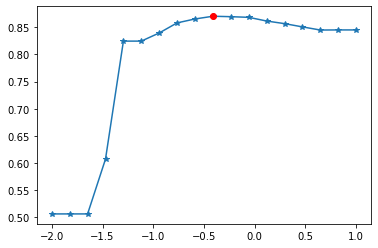

0.8704000000000001
0.3874675120456132
{'best_accuracy': 0.8704000000000001, 'best_c': 0.3874675120456132, 'scores': array([0.5064, 0.5064, 0.5064, 0.6074, 0.8246, 0.8246, 0.8396, 0.8582,
       0.8654, 0.8704, 0.8696, 0.8684, 0.8616, 0.8568, 0.8508, 0.845 ,
       0.8452, 0.8452])}


In [ ]:
import matplotlib.pyplot as plt

space = {'C': np.logspace(-2, 1, 18)}




plot_results(machine.results['linear']['scores'], machine.results['linear']
             ['best_c'],machine.results['linear']['best_accuracy'], name='linear')
print(machine.results['linear']['best_accuracy'])
print(machine.results['linear']['best_c'])

print(machine.results['linear'])


### Test function that will be called to evaluate your code. Separate test dataset will be provided

Do not modify the code below. Please write your code above such that it can be evaluated by the function below. You can modify your code above such that you obtain the best performance through this function.


In [ ]:
def test_func_svm(dataset_train, dataset_test):
    from sklearn.metrics import accuracy_score
    (X_train, Y_train, X_test, Y_test) = extract_bag_of_words_train_test(
        dataset_train, dataset_test)
    sc = SVMClassifier()
    sc.fit(X_train, Y_train)
    Y_Pred = sc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    print("Accuracy:", acc)
    return acc


In [ ]:
acc = test_func_svm("movie_review_train.csv", "movie_review_test.csv")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ferdi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ferdi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Accuracy: 0.8766666666666667


### Task 2

In this task you need to implement a boosting based classifier that can be used to classify the images.

Details regarding the marking for the coursework are provided in the coursework specification file. Please ensure that your code will work with a different test file than the one provided with the coursework.

Note that the boosting classifier you implement can include decision trees from scikit-learn or your own decision trees. Use the same sentiment analysis dataset for evaluation.


In [ ]:
class BoostingClassifier:
    # You need to implement this classifier.
    def __init__(self, n_trees=100, learning_rate=1.0, max_depth=3):
        import numpy as np
        # implement initialisation
        self.n_trees = n_trees
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.boosted_trees = []

    def gradient_boosting(self, X, y):
        """Creates a gradient boosting model from sklearn decision trees."""
        from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
        import numpy as np

        decision_trees = []
        tree = DecisionTreeClassifier(max_depth=self.max_depth).fit(X, y)
        decision_trees.append(tree)
        residuals = y - tree.predict(X)
        for i in range(self.n_trees-1):
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth).fit(X, residuals)
            decision_trees.append(tree)
            residuals = residuals - self.learning_rate * tree.predict(X)

        return decision_trees

    def cross_validation(self, X, y, n_folds):
        """Implement n-fold cross-validation for hyperparameter tuning."""
        from sklearn.metrics import accuracy_score

        val_accuracies = []
        all_indices = np.arange(0, len(X))
        for i in range(0, len(X), int(len(X)/n_folds)):
            val_indices = all_indices[i:i+int(len(X)/n_folds)]
            train_indices = np.delete(all_indices, val_indices)
            X_tr = X[train_indices]
            y_tr = y[train_indices]
            X_val = X[val_indices]
            y_val = y[val_indices]
            self.fit(X_tr, y_tr)
            val_predictions = self.predict(X_val)
            val_accuracies.append(accuracy_score(y_val, val_predictions))
        return val_accuracies

    def hyperparameter_tuning(self, X, y):
        """Tune the hyperparameters of the gradient boosting algorithm."""
        space = {'n_trees': [100, 250, 500],
                 'max_depth': [1, 3, 5, 7, 10, 15],
                 'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}
        best_accuracy = 0.0
        best_n_trees = 0
        best_depth = 0
        best_lr = 0

        for n_trees in space['n_trees']:
            for max_dpth in space['max_depth']:
                for lr in space['learning_rate']:
                    self.n_trees = n_trees
                    self.max_depth = max_dpth
                    self.learning_rate = lr
                    cv_results = self.cross_validation(X, y, n_folds=5)
                    print('n_trees =', n_trees)
                    print('max_depth =', max_dpth)
                    print('learning rate =', lr)
                    print('mean result:', np.mean(cv_results))
                    if np.mean(cv_results) > best_accuracy:
                        best_accuracy = np.mean(cv_results)
                        best_n_trees = n_trees
                        best_depth = max_dpth
                        best_lr = lr
        print('best_accuracy: ' + str(best_accuracy))
        print('best_n_trees: ' + str(best_n_trees))
        print('best_depth: ' + str(best_depth))
        print('best_lr: ' + str(best_lr))

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeClassifier
        import numpy as np
        # implement training of the boosting classifier
        boosted_trees = self.gradient_boosting(X, y)
        self.boosted_trees = boosted_trees.copy()
        return boosted_trees

    def predict(self, X):
        # implement prediction of the boosting classifier
        if self.boosted_trees == []:
            return None
        else:
            predictions = self.boosted_trees[0].predict(X)
            for tree in self.boosted_trees[1:]:
                predictions += self.learning_rate * tree.predict(X)
            # Change prediction to 0 if < 0.5, 1 if > 0.5
            predictions = np.array(
                [0 if prediction <= 0.5 else 1 for prediction in predictions])
            return predictions


In [ ]:
# Uncomment if SVM tuning has not already been done
# X_train, y_train, X_test, y_test = extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")
gb_model = BoostingClassifier()
gb_model.hyperparameter_tuning(X_train, y_train)


### Test function that will be called to evaluate your code. Separate test dataset will be provided

Do not modify the code below. Please write your code above such that it can be evaluated by the function below. You can modify your code above such that you obtain the best performance through this function.


In [ ]:
def test_func_boosting(dataset_train, dataset_test):
    from sklearn.metrics import accuracy_score
    (X_train, Y_train, X_test, Y_test) = extract_bag_of_words_train_test(
        dataset_train, dataset_test)
    bc = BoostingClassifier()
    bc.fit(X_train, Y_train)
    Y_Pred = bc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    return acc


In [ ]:
acc = test_func_boosting("movie_review_train.csv", "movie_review_test.csv")
